In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

WEEK_KOR = {0: "월", 1: "화", 2: "수", 3: "목", 4: "금", 5: "토", 6: "일"}
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#ff6666"]

In [4]:
# 사용할 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")  # Windows에서는 '맑은 고딕' 사용
plt.rc("axes", unicode_minus=False)  # 마이너스 부호 깨짐 방지

요일
금    6931.342656
목    6994.485540
수    6988.416286
월    6763.573968
일    5885.039734
토    6420.559551
화    6972.936834
Name: Consumption, dtype: float64


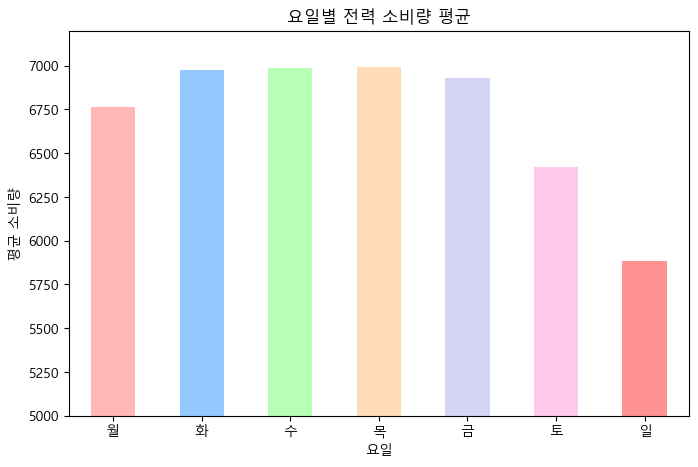

In [12]:
def load_csv(path: str) -> pd.DataFrame:
    """pandas를 이용하여 path의 데이터를 DataFrame의 형태로 반환합니다."""
    df = pd.read_csv(path)
    return df


def cvt_to_datetime(df: pd.DataFrame) -> pd.DataFrame:
    """df의 DateTime 칼럼을 datetime 형태로 변환합니다."""
    df["DateTime"] = pd.to_datetime(df["DateTime"], errors="coerce")
    return df


def add_dayofweek(df: pd.DataFrame) -> pd.DataFrame:
    """df에 DateTime 칼럼의 요일이 저장된 "요일" 칼럼을 새로 추가합니다."""
    df["요일"] = df["DateTime"].dt.weekday.map(WEEK_KOR)
    return df


def get_mean_consumption(df: pd.DataFrame) -> pd.Series:
    """df의 요일별 전력 소비량의 평균을 구하여 반환합니다."""
    series_mean = df.groupby("요일")["Consumption"].mean()
    return series_mean

def add_dayofweek(df: pd.DataFrame) -> pd.DataFrame:
    """df에 DateTime 칼럼의 요일이 저장된 "요일" 칼럼을 새로 추가합니다."""
    df["요일"] = df["DateTime"].dt.weekday.map(WEEK_KOR)
    return df

def plot_week_consumption(s_mean):
    """요일별 전력 소비량 평균 그래프 그리기"""
    s_mean = s_mean.reindex(WEEK_KOR.values())
    plt.figure(figsize=(8, 5))
    s_mean.plot(kind='bar', color = colors, alpha=0.7)
    plt.ylim(5000, 7200)
    plt.xlabel("요일");plt.ylabel("평균 소비량")
    plt.title("요일별 전력 소비량 평균")
    plt.xticks(rotation=0)
    plt.show()

def main():
    # 데이터 경로
    data_path = "./data/electronic.csv"

    # 데이터 불러오기
    df = load_csv(data_path)

    # 1. DateTime 칼럼을 datetime 형태로 변환
    df = cvt_to_datetime(df)

    # 2. 요일 칼럼 추가
    df = add_dayofweek(df)

    # 3. 요일별 전력 소비량의 평균 구하기
    s_mean = get_mean_consumption(df)
    print(s_mean)

    # 4. 요일별 전력소비량 평균 그래프
    plot_week_consumption(s_mean)



if __name__ == "__main__":
    main()

In [6]:
#시간대별 전력 소비량
df = pd.read_csv("data/electronic.csv")
df

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61


In [7]:
df["DateTime"] = pd.to_datetime(df["DateTime"])  # datetime 변환
df["Hour"] = df["DateTime"].dt.hour
hourly_mean = df.groupby("Hour")["Consumption"].mean()
print(hourly_mean)

Hour
0     5954.610313
1     5744.194517
2     5627.923629
3     5574.362630
4     5605.581593
5     5715.525457
6     6035.774804
7     6605.017624
8     7056.822454
9     7260.523499
10    7280.648825
11    7236.339426
12    7203.819191
13    7208.513708
14    7091.472585
15    7027.055483
16    7059.889687
17    7203.081593
18    7307.661880
19    7404.032637
20    7436.830287
21    7268.278721
22    6782.798303
23    6302.398172
Name: Consumption, dtype: float64


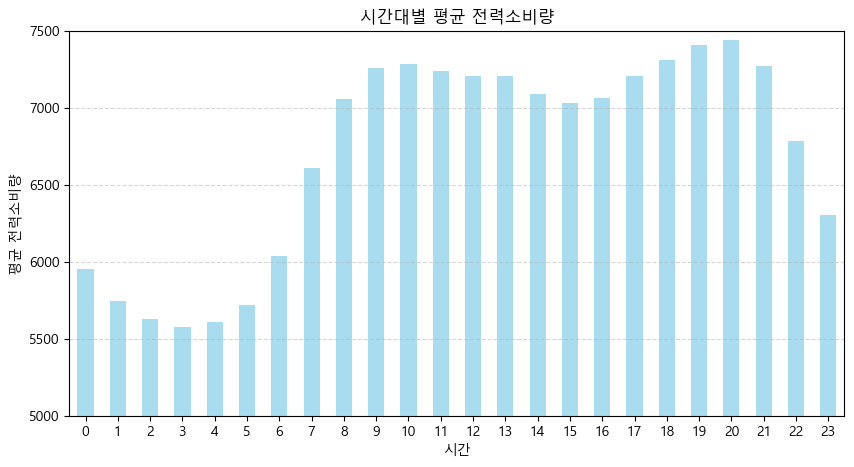

In [13]:
#시간대별 평균 전력소비량 그래프 그리기

plt.figure(figsize=(10, 5))
hourly_mean.plot(kind="bar", color='skyblue', alpha=0.7)
plt.ylim(5000, 7500)
plt.xlabel("시간");plt.ylabel("평균 전력소비량")
plt.title("시간대별 평균 전력소비량")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()